In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats #[For QQ-plot]
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/EDA/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-8-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

<ipython-input-10-3f60906517bc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


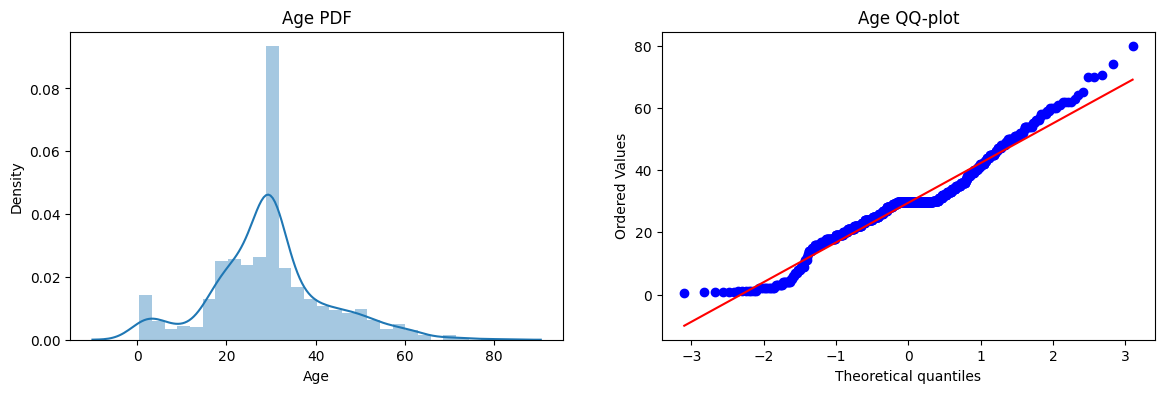

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(x_train['Age'],plot=plt)
plt.title('Age QQ-plot')

plt.show()

In [ ]:
x_train['Age'].skew()

0.3599658846236587

<ipython-input-16-e51ccfd89ba3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


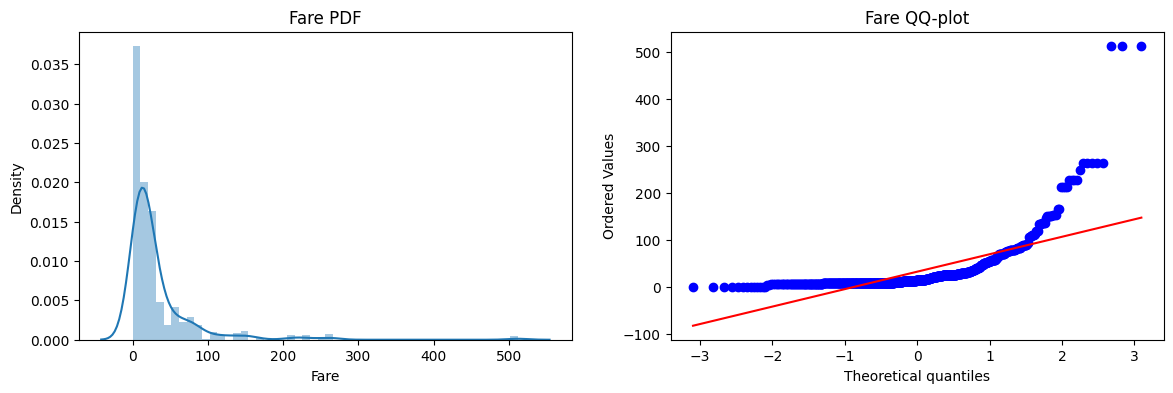

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(x_train['Fare'],plot=plt)
plt.title('Fare QQ-plot')

plt.show()

In [ ]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()

LR.fit(x_train,y_train)
DT.fit(x_train,y_train)

y_pred_LR=LR.predict(x_test)
y_pred_DT=DT.predict(x_test)

print('Accuracy_LR',accuracy_score(y_test,y_pred_LR))
print('Accuracy_DT',accuracy_score(y_test,y_pred_DT))

Accuracy_LR 0.6480446927374302
Accuracy_DT 0.6815642458100558


In [ ]:
Ltf=FunctionTransformer(func=np.log1p)
x_train_tf=Ltf.fit_transform(x_train)
x_test_tf=Ltf.transform(x_test)

In [ ]:
LR1=LogisticRegression()
DT1=DecisionTreeClassifier()

LR1.fit(x_train_tf,y_train)
DT1.fit(x_train_tf,y_train)

y_pred_LR1=LR1.predict(x_test_tf)
y_pred_DT1=DT1.predict(x_test_tf)

print('Accuracy_LR',accuracy_score(y_test,y_pred_LR1))
print('Accuracy_DT',accuracy_score(y_test,y_pred_DT1))

Accuracy_LR 0.6815642458100558
Accuracy_DT 0.6759776536312849


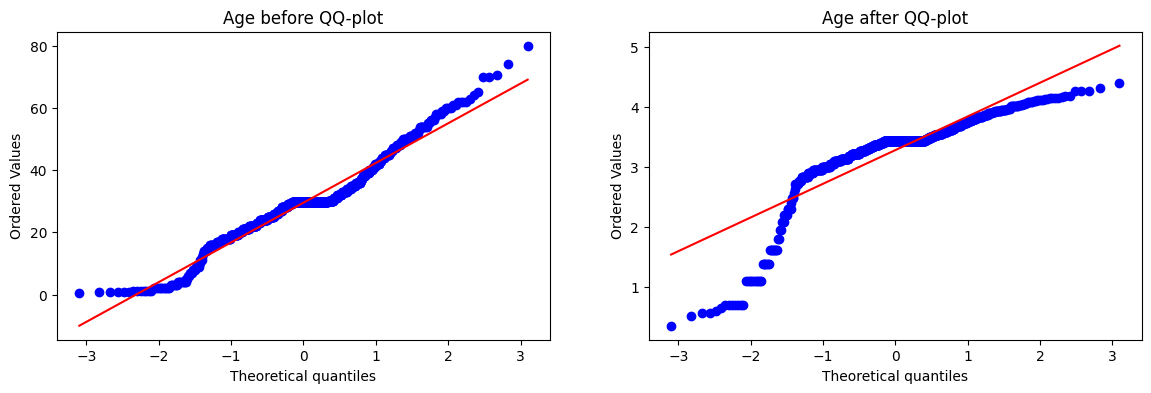

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
stats.probplot(x_train['Age'],plot=plt)
plt.title('Age before QQ-plot')

plt.subplot(1,2,2)
stats.probplot(x_train_tf['Age'],plot=plt)
plt.title('Age after QQ-plot')

plt.show()